In [23]:
# imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder , StandardScaler , OneHotEncoder
from sklearn.decomposition import TruncatedSVD

import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer



import warnings
warnings.filterwarnings("ignore")

In [2]:
# Get Data

data = pd.read_csv('C:/Users/Mohammad Amin Roohi/Desktop/data.csv')
test = pd.read_csv('C:/Users/Mohammad Amin Roohi/Desktop/test.csv')

data

,Unnamed: 0,Episode,Station,Channel Type,Season,Year,Date,Day of week,Start_time,End_time,Length,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Temperature in Montreal during episode
0,1,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,No,No,0.9,20.400000
1,2,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,NaN,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125000
2,3,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,NaN,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125000
3,4,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",NaN,News,No,Yes,No,No,1.7,18.125000
4,5,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",NaN,Reality Programs,No,Yes,No,No,2.2,18.250000
5,6,Opération séduction,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:30:00,2016-08-29 11:00:00,2,Opération séduction,NaN,Reality Programs,No,Yes,No,No,2.7,18.250000
6,7,Tic tac show,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 11:00:00,2016-08-29 11:30:00,2,Tic tac show,NaN,Game Shows,No,Yes,No,No,2.3,19.200000
7,8,Révolution,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 11:30:00,2016-08-29 12:30:00,4,Révolution,NaN,Ongoing Dramatic Series,No,Yes,No,No,1.4,19.550000
8,9,CSI: Miami,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 12:30:00,2016-08-29 13:30:00,4,CSI: Miami,NaN,Ongoing Dramatic Series,No,Yes,No,No,7.5,20.437500
9,10,CSI: Miami,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 13:30:00,2016-08-29 14:30:00,4,CSI: Miami,NaN,Ongoing Dramatic Series,No,Yes,No,No,12.1,21.400000


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154165 entries, 0 to 154164
Data columns (total 19 columns):
Unnamed: 0                                154165 non-null int64
Episode                                   154165 non-null object
Station                                   154165 non-null object
Channel Type                              154165 non-null object
Season                                    154165 non-null object
Year                                      154165 non-null int64
Date                                      154165 non-null object
Day of week                               154165 non-null object
Start_time                                154143 non-null object
End_time                                  154143 non-null object
Length                                    154165 non-null int64
Name of show                              154165 non-null object
Name of episode                           123546 non-null object
Genre                                     15416

In [96]:
data.describe(include='object')

,Episode,Station,Channel Type,Season,Date,Day of week,Start_time,End_time,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?
count,616613,616613,616613,616613,616613,616613,616613,616613,616613,394049,616613,616613,616613,616613,616613
unique,6687,24,2,4,877,7,138321,138333,6687,86555,27,2,2,2,2
top,Complément de programme canadien,Teletoon Fr.+,Specialty Channel,Fall,2018-02-07,Wednesday,2018-02-09 02:00:00,2018-09-21 23:00:00,Complément de programme canadien,(P),Animated Television Programs & Films,No,Yes,No,No
freq,9413,50746,535913,234291,840,89726,27,32,9413,13093,88876,599428,605960,610326,568803


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616613 entries, 0 to 616655
Data columns (total 21 columns):
Unnamed: 0                                616613 non-null int64
Episode                                   616613 non-null object
Station                                   616613 non-null object
Channel Type                              616613 non-null object
Season                                    616613 non-null object
Year                                      616613 non-null int64
Date                                      616613 non-null object
Day of week                               616613 non-null object
Start_time                                616613 non-null object
End_time                                  616613 non-null object
Length                                    616613 non-null int64
Name of show                              616613 non-null object
Name of episode                           394049 non-null object
Genre                                     61661

In [6]:
# Add Duration of Films as a Feature

data['Film_duration'] = (pd.to_datetime(data.End_time) - pd.to_datetime(data.Start_time)).astype('timedelta64[m]')
test['Film_duration'] = (pd.to_datetime(test.End_time) - pd.to_datetime(test.Start_time)).astype('timedelta64[m]')



In [7]:
# fill NA of Temperature---for this I used mean temp of related Season

data['Temperature in Montreal during episode'] = data.groupby('Season')['Temperature in Montreal during episode'].transform(lambda x: x.fillna(x.mean()))
test['Temperature in Montreal during episode'] = test.groupby('Season')['Temperature in Montreal during episode'].transform(lambda x: x.fillna(x.mean()))



In [8]:
# Omit rows that contain NA in End_time

data = data[~data.End_time.isna()]
test = test[~test.End_time.isna()]



In [9]:
# We have some rows which film duration is under zero!!!

data = data[data.Film_duration >= 0]
test = test[test.Film_duration >= 0]




In [10]:
# Extract Month, Day, Star_hours and End_hour of films as features 

data['Day_of_Month'] = pd.DatetimeIndex(data.Start_time).day  #(Assume that Start day and End day are the same)
data['Month'] = pd.DatetimeIndex(data.Start_time).month
data['Start_hour'] = pd.DatetimeIndex(data.Start_time).hour
data['End_hour'] = pd.DatetimeIndex(data.End_time).hour


test['Day_of_Month'] = pd.DatetimeIndex(test.Start_time).day
test['Month'] = pd.DatetimeIndex(test.Start_time).month
test['Start_hour'] = pd.DatetimeIndex(test.Start_time).hour
test['End_hour'] = pd.DatetimeIndex(test.End_time).hour



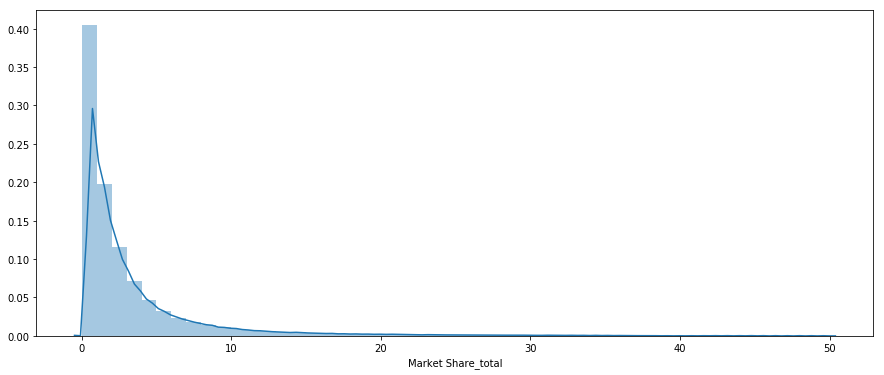

In [50]:
# Let's take a look at revenue distribution and outliers

figure(figsize=(15, 6))
sns.distplot(data['Market Share_total'])



## It seems there are afew data with Market Share > 50 (Outliers)

In [51]:
print('Number of Films with Market Share > 50 = ' , (data['Market Share_total'] > 50).sum())
data = data[data['Market Share_total'] < 50]



Number of Films with Market Share > 50 =  0


##  We have circular features like 'Day of week' and 'Season'. It's better to make transform them in a way such that we can have this property. For this, I decided to map them in the 2D plane and use cos and sin of each of them. 

In [73]:
season_circular_code = {'Spring' : 0 , 'Summer' : 1 , 'Fall' : 2 , 'Winter' : 3} #Code the seasons

data['season_circular_code'] = data.Season.map(season_circular_code)
data['season_circular_code'] = data['season_circular_code']*((2*np.pi)/4)                    
data['season_circular_code_sin'] = np.sin(data['season_circular_code'])
data['season_circular_code_cos'] = np.cos(data['season_circular_code'])
data.drop(['Season'] , axis=1, inplace=True)

test['season_circular_code'] = test.Season.map(season_circular_code)
test['season_circular_code'] = test['season_circular_code']*((2*np.pi)/4)                    
test['season_circular_code_sin'] = np.sin(test['season_circular_code'])
test['season_circular_code_cos'] = np.cos(test['season_circular_code'])
test.drop(['Season'] , axis=1, inplace=True)





week_circular_code = {'Monday' : 0 , 'Tuesday' : 1 , 'Wednesday' : 2 , 'Thursday' : 3 , 'Friday' : 4 , 'Saturday' : 5 , 'Sunday' : 6}
data['week_circular_code'] = data['Day of week'].map(week_circular_code)
data['week_circular_code'] = data['week_circular_code']*((2*np.pi)/7)                    
data['week_circular_code_sin'] = np.sin(data['week_circular_code'])
data['week_circular_code_cos'] = np.cos(data['week_circular_code'])
data.drop(['Day of week'] , axis=1, inplace=True)


test['week_circular_code'] = test['Day of week'].map(week_circular_code)
test['week_circular_code'] = test['week_circular_code']*((2*np.pi)/7)                    
test['week_circular_code_sin'] = np.sin(test['week_circular_code'])
test['week_circular_code_cos'] = np.cos(test['week_circular_code'])
test.drop(['Day of week'] , axis=1, inplace=True)




data['day_circular_code'] = data['Day_of_Month']*((2*np.pi)/31)                    
data['day_circular_code_sin'] = np.sin(data['day_circular_code'])
data['day_circular_code_cos'] = np.cos(data['day_circular_code'])
data.drop(['Day_of_Month'] , axis=1, inplace=True)


test['day_circular_code'] = test['Day_of_Month']*((2*np.pi)/31)                    
test['day_circular_code_sin'] = np.sin(test['day_circular_code'])
test['day_circular_code_cos'] = np.cos(test['day_circular_code'])
test.drop(['Day_of_Month'] , axis=1, inplace=True)





data['month_circular_code'] = data['Month']*((2*np.pi)/31)                    
data['month_circular_code_sin'] = np.sin(data['month_circular_code'])
data['month_circular_code_cos'] = np.cos(data['month_circular_code'])
data.drop(['Month'] , axis=1, inplace=True)

test['month_circular_code'] = test['Month']*((2*np.pi)/31)                    
test['month_circular_code_sin'] = np.sin(test['month_circular_code'])
test['month_circular_code_cos'] = np.cos(test['month_circular_code'])
test.drop(['Month'] , axis=1, inplace=True)




data['start_hour_circular_code'] = data['Start_hour']*((2*np.pi)/24)                    
data['start_hour_circular_code_sin'] = np.sin(data['start_hour_circular_code'])
data['start_hour_circular_code_cos'] = np.cos(data['start_hour_circular_code'])
data.drop(['Start_hour'] , axis = 1, inplace=True)


test['start_hour_circular_code'] = test['Start_hour']*((2*np.pi)/24)                    
test['start_hour_circular_code_sin'] = np.sin(test['start_hour_circular_code'])
test['start_hour_circular_code_cos'] = np.cos(test['start_hour_circular_code'])
test.drop(['Start_hour'] , axis = 1, inplace=True)




data['end_hour_circular_code'] = data['End_hour']*((2*np.pi)/24)                    
data['end_hour_circular_code_sin'] = np.sin(data['end_hour_circular_code'])
data['end_hour_circular_code_cos'] = np.cos(data['end_hour_circular_code'])
data.drop(['End_hour'] , axis = 1, inplace=True)


test['end_hour_circular_code'] = test['End_hour']*((2*np.pi)/24)                    
test['end_hour_circular_code_sin'] = np.sin(test['end_hour_circular_code'])
test['end_hour_circular_code_cos'] = np.cos(test['end_hour_circular_code'])
test.drop(['End_hour'] , axis = 1 , inplace=True)



## Let's seperate Categorical and Numerical Vaariables. In this step, I use One_Hot encoding for the categorical variables with low number of unique member. For other categorical variables, like episode, I use TF IDF and extract features of them. Besides, I decided not to use 'Name of episode' feature at all, because it has lots of NaN values and number of unique member is really high. About the 'Date', 'Start_time' and 'End_time, I have extracts my necessary information, so omit them too.

In [105]:
X_numerical = data.select_dtypes(exclude='object')
X_test_numerical = test.select_dtypes(exclude='object')

X_categorical = data.select_dtypes(include='object')
X_test_categorical = test.select_dtypes(include='object')

y = X_numerical['Market Share_total'] # our lables
X_numerical = X_numerical.drop(['Market Share_total' , 'Unnamed: 0'], axis = 1)  # Omit the lables of data
X_test_numerical = X_test_numerical.drop(['Unnamed: 0'], axis = 1) 


X_categorical = X_categorical.drop(['Name of episode' , 'Date' , 'Start_time' , 'End_time' , 'Episode' , 'Name of show'] , axis = 1)
X_test_categorical = X_test_categorical.drop(['Name of episode' , 'Date' , 'Start_time' , 'End_time' , 'Episode' , 'Name of show'] , axis = 1)



In [86]:
# Make the final data

#X_cat_coded = pd.get_dummies(X_categorical)
#X = pd.concat([X_numerical , X_cat_coded] , axis=1)


In [85]:
# One_Hot encoding

One_Hot = OneHotEncoder()

X_cat_coded = One_Hot.fit_transform(X_categorical).todense()
X_test_cat_coded = One_Hot.transform(X_test_categorical).todense()


In [91]:
# Encode other categorical features, or some with meaning in their texts

vectorizer_episode = TfidfVectorizer()
vectorizer_Name_of_Show = TfidfVectorizer()


episode = vectorizer_episode.fit_transform(data.Episode)
episode_test = vectorizer_episode.transform(test.Episode)

name_of_show = vectorizer_Name_of_Show.fit_transform(data['Name of show'])
name_of_show_test = vectorizer_Name_of_Show.transform(test['Name of show'])



svd_episode = TruncatedSVD(n_components=20)
svd_name_of_show = TruncatedSVD(n_components=20)


episode_low_dim = svd_episode.fit_transform(episode)
episode_test_low_dim = svd_episode.transform(episode_test)

name_of_show_low_dim = svd_episode.fit_transform(name_of_show)
name_of_show_test_low_dim = svd_episode.transform(name_of_show_test)





In [111]:
# Concat elements of datasets

Train = pd.concat([X_numerical.reset_index(drop=True) , pd.DataFrame(X_cat_coded).reset_index(drop=True) , pd.DataFrame(episode_low_dim).reset_index(drop=True) , pd.DataFrame(name_of_show_low_dim).reset_index(drop=True)] , axis=1)
Test = pd.concat([X_test_numerical.reset_index(drop=True) , pd.DataFrame(X_test_cat_coded).reset_index(drop=True) , pd.DataFrame(episode_test_low_dim).reset_index(drop=True) , pd.DataFrame(name_of_show_test_low_dim).reset_index(drop=True)] , axis=1)





In [113]:
# Split data for train and test

X_train , X_test , y_train , y_test = train_test_split(Train, y, test_size=0.2, random_state = 12)


In [118]:
# Start makeing different model---- A simple regression(As we have lots of dummy variable, we don't expect that simple regression works good)


Lin_reg = LinearRegression()

scores = cross_val_score(Lin_reg, Train , y, cv=5)

scores.mean()

0.6391389029285081

In [119]:
# Let's Make data nolrmalized and test again

Train_normalized = (Train - Train.mean())/Train.std()

scores = cross_val_score(Lin_reg, Train_normalized , y, cv=5)

scores.mean()

0.6390828113358651

In [120]:
# Let's take a look at correlation of label and our features

data_for_corr = X_numerical.copy()
data_for_corr['Market Share_total'] = y
corr = data_for_corr.corr()
corr['Market Share_total'].sort_values(ascending = False)

Market Share_total                        1.000000
end_hour_circular_code                    0.057104
start_hour_circular_code                  0.044324
week_circular_code_sin                    0.022373
Film_duration                             0.012483
Temperature in Montreal during episode    0.012276
Length                                    0.007944
month_circular_code_sin                   0.006886
month_circular_code                       0.006271
season_circular_code_sin                  0.003893
day_circular_code                         0.001584
season_circular_code                      0.001531
week_circular_code_cos                    0.000924
day_circular_code_cos                     0.000822
day_circular_code_sin                    -0.001350
month_circular_code_cos                  -0.006513
start_hour_circular_code_cos             -0.008601
end_hour_circular_code_cos               -0.009219
season_circular_code_cos                 -0.011017
Year                           

In [145]:
# Let's make different power of most important features(High correlated at this step) ad new features(Somehow a Polynimial regression)

X_poly = Train.copy()
X_poly['Year'] = X_poly['Year'] - 2015 # Subtract offset

X_poly['end_hour_circular_code_2s'] = X_poly['end_hour_circular_code']**2
X_poly['end_hour_circular_code_sqrt'] = np.sqrt(X_poly['end_hour_circular_code'])
#X_poly['end_hour_circular_code_3s'] = X_poly['end_hour_circular_code']**3

X_poly['start_hour_circular_code_2s'] = X_poly['start_hour_circular_code']**2
X_poly['start_hour_circular_code_sqrt'] = np.sqrt(X_poly['start_hour_circular_code'])
#X_poly['start_hour_circular_code_3s'] = X_poly['start_hour_circular_code']**3


#X_poly['Film_duration_3s'] = X_poly['Film_duration']**3
X_poly['Film_duration_2s'] = X_poly['Film_duration']**2
X_poly['Film_duration_sqrt'] = np.sqrt(X_poly['Film_duration'])



#X_poly['week_circular_code_3s'] = X_poly['week_circular_code']**3
X_poly['week_circular_code_2s'] = X_poly['week_circular_code']**2
X_poly['week_circular_code_sqrt'] = np.sqrt(X_poly['week_circular_code'])


X_poly['Temperature in Montreal during episode_3'] = X_poly['Temperature in Montreal during episode']**3
#X_poly['Temperature in Montreal during episode_5'] = X_poly['Temperature in Montreal during episode']**5


X_poly['Year_2s'] = X_poly['Year']**2
X_poly['Year_sqrt'] = np.sqrt(X_poly['Year'])
X_poly['Year_3'] = X_poly['Year']**3
X_poly['Year_4'] = X_poly['Year']**4
#X_poly['Year_5'] = X_poly['Year']**5


In [146]:
scores = cross_val_score(Lin_reg, X_poly , y, cv=5)

scores.mean()


0.6422902138615013

In [148]:
# Ridge Regression and a Grid Search

ridge = Ridge()

alpha = [0.1 , 0.5 , 1 , 1.5 , 5 , 10 , 15]
solver = ['svd' , 'auto']

param = {'alpha' : alpha , 'solver' : solver}

clf = GridSearchCV(ridge, param)

clf.fit(Train , y)


print('Best Score is: ' , clf.best_score_)
print('Best Parameters is: ' , clf.best_params_)
print('Best Estimator is: ' , clf.best_estimator_)

ridge = clf.best_estimator_

ridge_best_apha = clf.best_params_['alpha']


Best Score is:  0.6304398408640501
Best Parameters is:  {'alpha': 0.1, 'solver': 'auto'}
Best Estimator is:  Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [150]:
# Try to improve Ridge one more step

ridge = Ridge()

ridge_best_apha = clf.best_params_['alpha']

alpha = [0.6*ridge_best_apha , 0.8*ridge_best_apha, ridge_best_apha, ridge_best_apha, 1.2*ridge_best_apha, 1.5*ridge_best_apha, 2*ridge_best_apha, 2.5*ridge_best_apha, 3*ridge_best_apha]

solver = [clf.best_params_['solver']]

param = {'alpha' : alpha , 'solver' : solver}

clf_ridge_second_try = GridSearchCV(ridge, param)

clf_ridge_second_try.fit(Train , y)

print('Best Score is: ' , clf_ridge_second_try.best_score_)
print('Best Parameters is: ' , clf_ridge_second_try.best_params_)
print('Best Estimator is: ' , clf_ridge_second_try.best_estimator_)





Best Score is:  0.6307412491429778
Best Parameters is:  {'alpha': 0.06, 'solver': 'auto'}
Best Estimator is:  Ridge(alpha=0.06, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [152]:
# Lasso Regression


lasso = Lasso()

alpha = [0.1 , 0.5 , 1 , 1.5 , 5 , 10 , 15]

param = {'alpha' : alpha}

clf_lasso = GridSearchCV(ridge, param)

clf_lasso.fit(Train , y)


print('Best Score is: ' , clf_lasso.best_score_)
print('Best Parameters is: ' , clf_lasso.best_params_)
print('Best Estimator is: ' , clf_lasso.best_estimator_)


Best Score is:  0.6304398408640501
Best Parameters is:  {'alpha': 0.1}
Best Estimator is:  Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [159]:
X_train.columns[22:]

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       ...
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
      dtype='object', length=101)

In [171]:
# XGBoosting regressor--- Let's try a boosting approach---But it's really better to tune the parameters in this approach

Train.columns = range(123)
X_train , X_test , y_train , y_test = train_test_split(Train, y, test_size=0.2, random_state = 12)

xgb_regression = xgb.XGBRegressor().fit(X_train , y_train)

xgb_regression.score(X_test , y_test)





[21:45:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7846287266119664

In [172]:
# XGBoosting random forest regressor

xgb_rf_regression = xgb.XGBRFRegressor().fit(X_train , y_train)
xgb_rf_regression.score(X_test , y_test)




[21:55:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.6385505318158726

In [174]:
# Testing Random Forest

rf_model = RandomForestRegressor()


scores = cross_val_score(rf_model, Train, y, cv=5)

scores.mean()


0.8357288656067198

In [175]:
# Now We Use the random forest regressor model and predict the market value for the test data
# We can increase this score by using grid search and tune hyper parameters

rf_model = RandomForestRegressor().fit(Train , y)

market_value_predicted = rf_model.predict(Test)

# Please be aware that there is a column named 'Unnamed: 0' in the output file. You may want to omit this column.

pd.DataFrame(market_value_predicted).to_csv('C:/Users/Mohammad Amin Roohi/Desktop/market_value_predicted.csv')